# PySpark

In [1]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local[*]").setAppName("Spark Lab")
sc = SparkContext(conf = conf)

In [2]:
sc

<SparkContext master=local[*] appName=Spark Lab>

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# Helper function to test the correctness of the solutions
def test(var, val, msg=""):
    print("1 test passed.") if var == val else print("1 test failed. " + msg)

## Ejercicio 0

In [3]:
def word_count_rdd(path):
    lines = sc.textFile('C:\\Users\\ruben\\Downloads\\quixote.txt')
    words = lines.flatMap(lambda line : line.split(' ')).filter(lambda word: word != '')
    valores = words.countByValue()
    ordenados = sorted(valores.items(), key = lambda x: x[1], reverse = True)[:10]
    return ordenados

In [4]:
word_count_rdd('C:\\Users\\ruben\\Downloads\\quixote.txt')

[('the', 20923),
 ('and', 16606),
 ('to', 13492),
 ('of', 12866),
 ('that', 7164),
 ('a', 7003),
 ('in', 6860),
 ('I', 5756),
 ('he', 5640),
 ('for', 4534)]

In [5]:
top10_quixote = word_count_rdd('C:\\Users\\ruben\\Downloads\\quixote.txt')
print(top10_quixote)
test(top10_quixote, [('the', 20923), ('and', 16606), ('to', 13492), ('of', 12866), 
                                  ('that', 7164), ('a', 7003), ('in', 6860), ('I', 5756), ('he', 5640), 
                                  ('for', 4534)], "Try again!")

[('the', 20923), ('and', 16606), ('to', 13492), ('of', 12866), ('that', 7164), ('a', 7003), ('in', 6860), ('I', 5756), ('he', 5640), ('for', 4534)]
1 test passed.


# Ejercicio 1 (quitar signos de puntuacion)

In [6]:
import re
def remove_punctuation_symbols(text):
    """This function converts the string to lower case and removes punctuation symbols and extra spaces"""
    accepted_chars = re.compile(r'[^0-9a-zA-Z ]')
    text = accepted_chars.sub(' ', text.lower()).strip()
    return re.sub(' +', ' ', text)

In [7]:
def word_count_rdd_2(file_path):
  lines=sc.textFile(file_path)
  words=lines.map(lambda x: remove_punctuation_symbols(x))\
             .flatMap(lambda x: x.split(' '))\
             .filter(lambda x: x!= '')\
             .map(lambda x: (x,1))\
             .reduceByKey(lambda x,y: x+y)
  output=words.takeOrdered(10,key=lambda x: -x[1])
  return output

word_count_rdd_2('C:\\Users\\ruben\\Downloads\\quixote.txt')

[('the', 22471),
 ('and', 17722),
 ('to', 14006),
 ('of', 13491),
 ('that', 7993),
 ('in', 7335),
 ('a', 7287),
 ('i', 6653),
 ('he', 6157),
 ('it', 5680)]

In [8]:
top10_quixote = word_count_rdd_2('C:\\Users\\ruben\\Downloads\\quixote.txt')
test(top10_quixote, [('the', 22471), ('and', 17722), ('to', 14006), ('of', 13491), ('that', 7993),
                                 ('in', 7335), ('a', 7287), ('i', 6653), ('he', 6157), ('it', 5680)],
                  'Try again!')

1 test passed.


# Ejercicio 2

In [9]:
stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 
              'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 
              'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into',
              'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 
              'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below',
              'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me',
              'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 
              'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she',
              'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and',
              'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 
              'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not',
              'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too',
              'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't',
              'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 
              'how', 'further', 'was', 'here', 'than']

In [10]:
def word_count_rdd_3(file_path):
  lines=sc.textFile(file_path)
  words=lines.map(lambda x: remove_punctuation_symbols(x))\
             .flatMap(lambda x: x.split(' '))\
             .filter(lambda x: x!= '')\
             .filter(lambda word: word not in stop_words)\
             .map(lambda x: (x,1))\
             .reduceByKey(lambda x,y: x+y)
  output=words.takeOrdered(10,key=lambda x: -x[1])
  return output

word_count_rdd_2('C:\\Users\\ruben\\Downloads\\quixote.txt')

[('the', 22471),
 ('and', 17722),
 ('to', 14006),
 ('of', 13491),
 ('that', 7993),
 ('in', 7335),
 ('a', 7287),
 ('i', 6653),
 ('he', 6157),
 ('it', 5680)]

In [11]:
top10_quixote = word_count_rdd_3('C:\\Users\\ruben\\Downloads\\quixote.txt')
test(top10_quixote, [('said', 2627), ('quixote', 2327), ('sancho', 2205), ('one', 1623), ('would', 1251),
                                  ('thou', 1229), ('say', 904), ('good', 889), ('may', 855), ('see', 774)],
                  'Try again!')

1 test passed.


## Ejercicio 1. Histograma

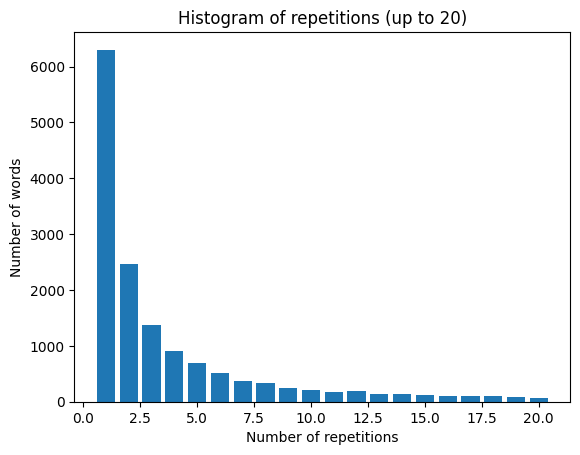

In [17]:
def histogram_reps(path):
    lines=sc.textFile(path)
    words=lines.map(lambda x: remove_punctuation_symbols(x)).flatMap(lambda x: x.split(' ')).filter(lambda x: x!= '')\
    .map(lambda x: (x,1)).reduceByKey(lambda x,y: x+y)
    words2=words.map(lambda x: (x[1],1)) #.map(lambda x: (x,1))
    words3 = words2.reduceByKey(lambda x,y: x+y).takeOrdered(20) # #.reduceByKey(lambda x,y: x+y).
    return words3
histogram_reps('C:\\Users\\ruben\\Downloads\\quixote.txt')
(x_values, y_values) = zip(*histogram_reps('C:\\Users\\ruben\\Downloads\\quixote.txt'))
plt.bar(x_values, y_values)
plt.title('Histogram of repetitions (up to 20)')
plt.xlabel('Number of repetitions')
plt.ylabel('Number of words')
plt.show()


In [22]:
hist_quixote = histogram_reps('C:\\Users\\ruben\\Downloads\\quixote.txt')
test(hist_quixote[:10],[(1, 6303), (2, 2469), (3, 1382), (4, 903), (5, 688), (6, 511), (7, 367), (8, 340), 
                                     (9, 239), (10, 207)], "Try again!")

1 test passed.


# Ejercicio 2. Histograma length

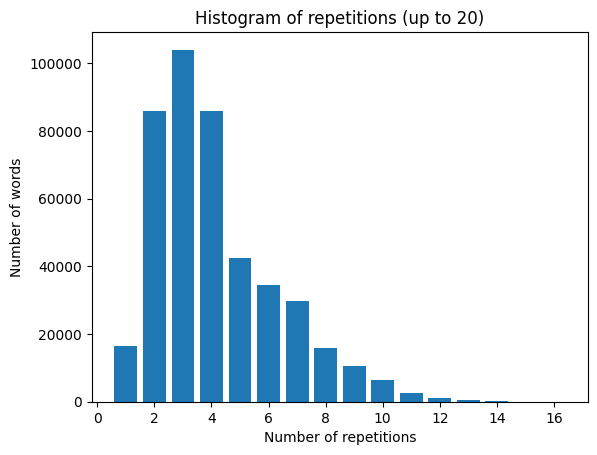

In [52]:
def histogram_length(path):
    lines=sc.textFile(path)
    words=lines.map(lambda x: remove_punctuation_symbols(x)).flatMap(lambda x: x.split(' ')).filter(lambda x: x!= '').map(lambda x: (len(x), 1))\
        .reduceByKey(lambda x,y: x+y).takeOrdered(16)
    return words

(x_values, y_values) = zip(*histogram_length(('C:\\Users\\ruben\\Downloads\\quixote.txt')))
plt.bar(x_values, y_values)
plt.title('Histogram of repetitions (up to 20)')
plt.xlabel('Number of repetitions')
plt.ylabel('Number of words')
plt.show()


In [53]:
length_quixote = histogram_length('C:\\Users\\ruben\\Downloads\\quixote.txt')
print(length_quixote)
test(length_quixote, [(1, 16557), (2, 86007), (3, 104061), (4, 85836), (5, 42352), (6, 34381), (7, 29737),
                                   (8, 15982), (9, 10454), (10, 6409), (11, 2516), (12, 1210), (13, 482), (14, 152),
                                   (15, 60), (16, 7)],"Try again!")

[(1, 16557), (2, 86007), (3, 104061), (4, 85836), (5, 42352), (6, 34381), (7, 29737), (8, 15982), (9, 10454), (10, 6409), (11, 2516), (12, 1210), (13, 482), (14, 152), (15, 60), (16, 7)]
1 test passed.


# Ejercicio 3. Media de las palabras

In [85]:
def contar(nums):
    sumatorio = [0,0]
    for num in nums:
        sumatorio[0] += num
        sumatorio[1] += 1
    return [sumatorio]
    
def average_length(path):
    lines=sc.textFile(path)
    words=lines.map(lambda x: remove_punctuation_symbols(x))\
               .flatMap(lambda x: x.split(' '))\
               .filter(lambda x: x!= '')\
               .map(lambda x: len(x))\
               .filter(lambda x: x<17)
    med = words.map(lambda x: (x,1)).reduce(lambda x,y : (x[0] + y[0], x[1] + y[1]))
    return med[0]/med[1]

In [86]:
avg = average_length("C:\\Users\\ruben\\Downloads\\quixote.txt")
test(round(avg,5), 4.14471, 'Try again!')

1 test passed.


# Ejercicio 4. LastFM

In [87]:
def get_subset(input_filename, output_filename, num_lines, enc = "utf-8"):
    with open(input_filename, encoding=enc) as openfile:
        with open(output_filename, 'w', encoding=enc) as outfile:
            for i in range(num_lines):
                line = openfile.readline()
                outfile.write(line)

In [88]:
get_subset("C:\\Users\\ruben\\Desktop\\data engineering\\s4-pyspark\\lastfm-dataset-360K\\lastfm-dataset-360K\\usersha1-artmbid-artname-plays.tsv",'C:\\Users\\ruben\\Desktop\\data engineering\\s4-pyspark\\lastfm-dataset-360K\\lastfm-dataset-360K\\sample3000_usersha1-artmbid-artname-plays.tsv', 3000 )

In [119]:
lines=sc.textFile('C:\\Users\\ruben\\Desktop\\data engineering\\s4-pyspark\\lastfm-dataset-360K\\lastfm-dataset-360K\\sample3000_usersha1-artmbid-artname-plays.tsv')
data = lines.map(lambda x: x.split('\t')).filter(lambda x: (x[2])).take(10)
data

[['00000c289a1829a808ac09c00daf10bc3c4e223b',
  '3bd73256-3905-4f3a-97e2-8b341527f805',
  'betty blowtorch',
  '2137'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
  'f2fb0ff0-5679-42ec-a55c-15109ce6e320',
  'die Ärzte',
  '1099'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
  'b3ae82c2-e60b-4551-a76d-6620f1b456aa',
  'melissa etheridge',
  '897'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
  '3d6bbeb7-f90e-4d10-b440-e153c0d10b53',
  'elvenking',
  '717'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
  'bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8',
  'juliette & the licks',
  '706'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
  '8bfac288-ccc5-448d-9573-c33ea2aa5c30',
  'red hot chili peppers',
  '691'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
  '6531c8b1-76ea-4141-b270-eb1ac5b41375',
  'magica',
  '545'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
  '21f3573f-10cf-44b3-aeaa-26cccd8448b5',
  'the black dahlia murder',
  '507'],
 ['00000c289a1829a808ac09c00daf10bc3c4e223b',
